In [3]:
import pandas as pd

iris = pd.read_csv("iris_data.txt", sep = '\t')
iris

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Clustering: ver agrupamiento de datos, series de datos agrupados. 

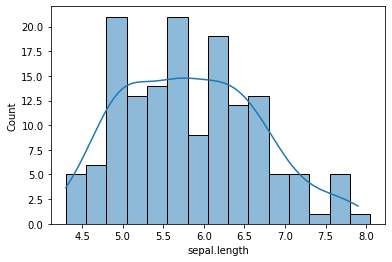

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 

g = sns.histplot(data = iris, x = "sepal.length", binwidth=0.25, kde = True)
plt.show()

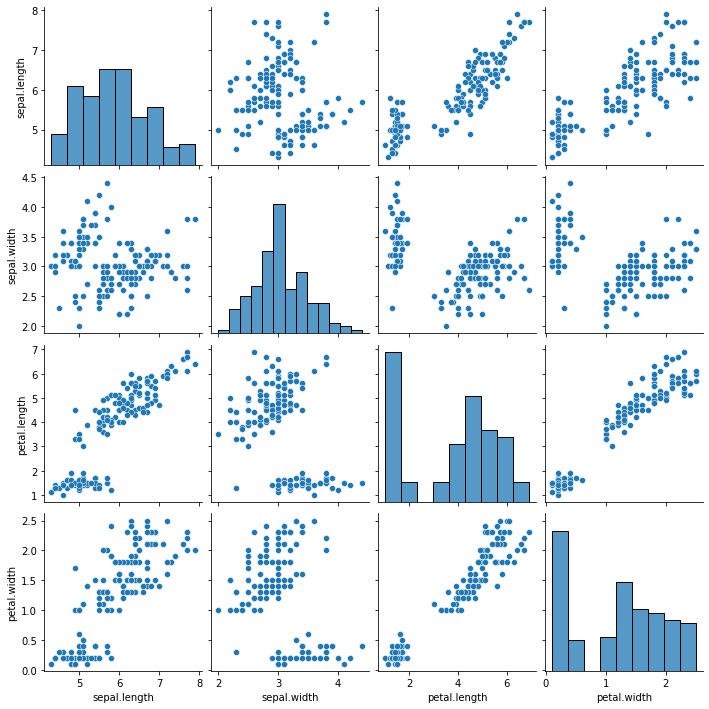

In [5]:
import seaborn as sns

g = sns.pairplot(iris)

Correlatograma: demuestra la relación entre los datos.
Análisis de clustering: ver como se comportan los datos y ver si puedo agruparlos de alguna forma. Hacer subclases.
El taggeo de las clases no siempre es clara y muchas veces es subjetiva.
Distancia entre dos tipos de datos (entre puntos). 
- Buscamos patrones y en base a cuantos comparten los agrupo. Los clasificamos como puntos en el espacio. 
- No todos los datos se ponderan de la misma forma. A los datos hay que limpiarlos, escalarlos y normalizarlos. 
Normalizar: hacer los datos comparables.
Escalado: llevar los datos a la misma escala numérica.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_escaleado = scaler.fit_transform(iris)

In [7]:
!pip3 install sklearn

You should consider upgrading via the 'C:\Users\marti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


K-means: sirve para agrupar datos. Parte de un número dado de grupos. Define nodos al azar (datos) y a partir de ellos calcula la distancia de los demás puntos. Calcula la distancia de cada uno de los datos representativos de cada uno de mi dataset.
- Toma un dataset y un número dde grupos estimado.
- Centroides al azar.
- Calcula distancias a los centroides.
- Una vez que ya tiene los grupos, recalcula los centroides.
- Reagrupa, recalcula las distancias.

In [8]:
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans

k = 3  #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones
kmeans.fit(iris_escaleado)  #aplicamos el método a nuestros datos

KMeans(init='random', n_clusters=3, random_state=123457)

In [9]:
print(kmeans.labels_) #A que datos le asigno a que grupo.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
print(kmeans.cluster_centers_ )

[[-0.06881714 -0.89036741  0.34501443  0.28492552]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13140499  0.08716178  0.98548265  0.99875633]]


n_clasters: la cantidad de centroides.

In [11]:
from scipy import stats
w, p = stats.shapiro(iris["sepal.width"])
p 

0.0751834362745285

Si es mayor al 0.05 es una distribución normal

In [12]:
iris_escaleado

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [13]:
iris_escaleado[:,2]

array([-1.3412724 , -1.3412724 , -1.39813811, -1.2844067 , -1.3412724 ,
       -1.17067529, -1.3412724 , -1.2844067 , -1.3412724 , -1.2844067 ,
       -1.2844067 , -1.227541  , -1.3412724 , -1.51186952, -1.45500381,
       -1.2844067 , -1.39813811, -1.3412724 , -1.17067529, -1.2844067 ,
       -1.17067529, -1.2844067 , -1.56873522, -1.17067529, -1.05694388,
       -1.227541  , -1.227541  , -1.2844067 , -1.3412724 , -1.227541  ,
       -1.227541  , -1.2844067 , -1.2844067 , -1.3412724 , -1.2844067 ,
       -1.45500381, -1.39813811, -1.2844067 , -1.39813811, -1.2844067 ,
       -1.39813811, -1.39813811, -1.39813811, -1.227541  , -1.05694388,
       -1.3412724 , -1.227541  , -1.3412724 , -1.2844067 , -1.3412724 ,
        0.53529583,  0.42156442,  0.64902723,  0.1372359 ,  0.47843012,
        0.42156442,  0.53529583, -0.26082403,  0.47843012,  0.08037019,
       -0.14709262,  0.25096731,  0.1372359 ,  0.53529583, -0.09022692,
        0.36469871,  0.42156442,  0.1941016 ,  0.42156442,  0.08

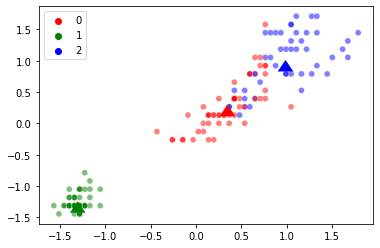

In [14]:
import seaborn as sns
colores = ["red", "green", "blue"]
g = sns.scatterplot(x = iris_escaleado[:,2], y = iris_escaleado[:, 3], hue = kmeans.labels_, palette = colores, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette = colores, hue = [0, 1, 2], legend = False, marker=6, s=200)
#Primera elijo los colores, la segunda el tamaño, la tercera grafica los puntos y la cuarta pone los triángulos

In [15]:
print(kmeans.inertia_) 
#La inercia por si misma no nos dice nada, tenemos que ver como varía esa inercia con la distinta cantidad de grupos.
#La incercia nos dice cuan confiable es nuestra separación de grupos. Mientras más chico el valor, la separación es mejor.

140.96837895511075


In [16]:
inercias = {}
def incercias_por_k(diccionario):
    for i in range(1, 11):
        kmeans = KMeans(n_clusters= i, init= "random", n_init= 10, max_iter= 300, random_state= 1234567)
        kmeans.fit(iris_escaleado)
        diccionario[i] = kmeans.inertia_

#Cuando hacemos el kmeans nosotros ya calculamos la inercia
#
#Init: coloca los centroides en posición aleatoria

In [17]:
incercias_por_k(inercias)

In [18]:
inercias

{1: 600.0,
 2: 223.73200573676345,
 3: 140.96581663074699,
 4: 114.42714544645857,
 5: 91.58093177956651,
 6: 81.75658187204955,
 7: 70.88546993521874,
 8: 62.801554625333594,
 9: 54.637643179559234,
 10: 47.7106562641797}

Lo grafico para encontrar la menor inercia con la menor cantidad de grupos. La regla del codo, elegir el punto donde cambia mucho la pendiente. En este caso seria 2 o 3 grupos. 

In [19]:
df_incercias = pd.DataFrame(inercias.items(), columns=["K", "inercia"])

<AxesSubplot:xlabel='K', ylabel='inercia'>

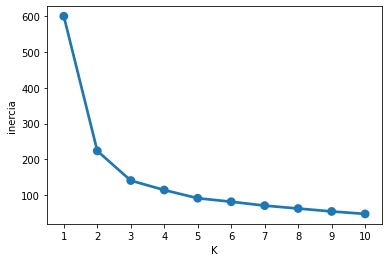

In [20]:
sns.pointplot(data= df_incercias, x = "K", y ="inercia" )

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [22]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

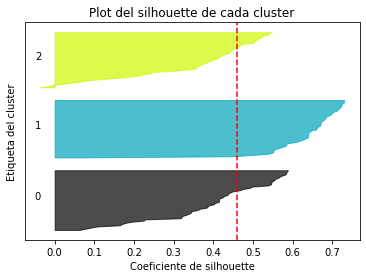

In [23]:
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)
#Nos dice cuántos de nuestros datos son confibles o no. Más cercanos a 1 son más confiables, más cercanos a -1 son menos confiables.
#Nos dice que la separación que hicimos en los grupos están bien. Es decir, en este caso que es correcto haberlo dividido en 2 o 3 grupos.
#Ciertos datos del grupo 2 podrían estar en otro grupo. Por lo tanto probablemente sea más confiable dividirlo en 2 grupos.

PANDAS: importante -> head, tail y merge.
Anomalías en DataFrames: datos Nulos, duplicados dropduplicates, outlayers graficar.